# Using UMAP on Alpha and Beta Cell Vesicles

In [ ]:
conda install pandoc


In [ ]:
conda install xelatex 

In [ ]:
conda install matplotlib


In [ ]:
conda install pandas 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
from matplotlib.colors import LinearSegmentedColormap


In [3]:
import matplotlib.pyplot as plt


# Dictionary

In [2]:
# creating a dictionary to quickly access resolutions of individual cells
Cell_Res = {
## alpha
  "10498_32": 46.5, 
  "10510_40_41": 46.5, 
  "8_3_4": 43.4,
  "9_2_3": 30,
  "12_4" : 41.66,
  "5288_9_1L" : 41.66,
  "5288_9_2R" : 41.66,
  "5293_11_12Alpha" : 39.98, 
## beta
  "10498_9_10" : 33.1,
  "10501_7" : 41.6,
  "10_10_11_12L" : 43.4,
  "10_10_11_12R" : 43.4,
  "5293_11_12L" : 39.98,
  "5293_11_12R" : 39.98
  
}

## 7 alpha cells, 6 beta cells

In [3]:
Cell_Res["10501_7"]

41.6

In [4]:
type(Cell_Res)

dict

# Loading in and Processing Data


In [4]:
def ResMultBeta(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
    result_df["EqDiameter"] = result_df["EqDiameter"] * factor
    result_df["Area3d"] = result_df["Area3d"] * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 0 
    
    return result_df

def ResMultAlpha(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
    result_df["EqDiameter"] = result_df["EqDiameter"] * factor
    result_df["Area3d"] = result_df["Area3d"] * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 1 
    
    return result_df

def ResMultAlphaVoxel(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
# extra factor indicated to transform voxel size of 0.002 ^ 3 to 1 ^ 3 
    result_df["EqDiameter"] = result_df["EqDiameter"] * 500 * factor 
    result_df["Area3d"] = result_df["Area3d"] * 250000 * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * 125000000 * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 1 
    
    return result_df

def ResMultBetaVoxel(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
# extra factor indicated to transform voxel size of 0.002 ^ 3 to 1 ^ 3 
    result_df["EqDiameter"] = result_df["EqDiameter"] * 500 * factor 
    result_df["Area3d"] = result_df["Area3d"] * 250000 * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * 125000000 * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 0 
    
    return result_df

In [5]:
#Alpha Kevin
#df10510_19_21 = pd.read_csv("E:/Alpha and Beta Cells/Alpha Cell Vesicles/10510 19_21 Vesicles.csv", skiprows=1)
#dfRes10510_19_21 = ResMultAlpha(df10510_19_21, 37.7)

df10498_32 = pd.read_csv("E:/Alpha and Beta Cells/Alpha Cell Vesicles/10498_32 Vesicles.csv",skiprows=1)
df10504_11_12 = pd.read_csv("E:/Alpha and Beta Cells/Alpha Cell Vesicles/10504 11_12 Vesicles.csv", skiprows=1)

dfRes10498_32 = ResMultAlphaVoxel(df10498_32, 46.5)
dfRes10504_11_12 = ResMultAlpha(df10504_11_12, 33.1)

#combine dataframes
combined_dfAlphaKev = pd.concat([dfRes10498_32,dfRes10504_11_12])
combined_dfAlphaKev.shape

(3487, 14)

In [6]:
#Alpha Aneesh 

df8_3_4 = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/8_3-4 Vesicles.csv",skiprows=1)
dfRes8_3_4 = ResMultAlpha(df8_3_4, 43.4)
df9_2_3 = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/9_2_3 Vesicles.csv",skiprows=1)
dfRes9_2_3 = ResMultAlpha(df9_2_3, 30)
df12_4 = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/12_4 Vesicles.csv",skiprows=1)
dfRes12_4 = ResMultAlphaVoxel(df12_4, 41.66)
df5288_9_1L = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/5288_9-1 Vesicles Cell L.csv",skiprows=1)
dfRes5288_9_1L = ResMultAlphaVoxel(df5288_9_1L, 41.66)
df5288_9_2R = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/5288_9-2 Vesicles Cell R.csv",skiprows=1)
dfRes5288_9_2R = ResMultAlphaVoxel(df5288_9_2R, 41.66)
df5293_11_12Alpha = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/5293_11-12 Vesicles Alpha.csv",skiprows=1)
dfRes5293_11_12Alpha = ResMultAlpha(df5293_11_12Alpha, 39.98)

combined_dfAlphaAneesh = pd.concat([dfRes9_2_3,dfRes8_3_4,dfRes12_4, dfRes5288_9_1L,dfRes5288_9_2R, dfRes5293_11_12Alpha])
combined_dfAlphaAneesh.shape

(7258, 14)

In [7]:
combined_dfAlphatotal = pd.concat([combined_dfAlphaAneesh, combined_dfAlphaKev])
combined_dfAlphatotal.shape

(10745, 14)

In [8]:
#Beta Kevin

df10498_9_10 = pd.read_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/10498_9-10 Vesicles.csv",skiprows=1)
dfRes10498_9_10 = ResMultBeta(df10498_9_10, 33.1)
df10501_7 = pd.read_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/10501_7 Vesicles.csv",skiprows=1)
dfRes10501_7 = ResMultBetaVoxel(df10501_7, 41.6)
df10501_5 = pd.read_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/10501_5 Vesicles.csv",skiprows=1)
dfRes10501_5 = ResMultBetaVoxel(df10501_5, 39.6)

#combine
combined_dfBetaKev = pd.concat([dfRes10498_9_10, dfRes10501_7, dfRes10501_5])
combined_dfBetaKev.shape

(4698, 14)

In [9]:
#Beta Aneesh

df10_10_11_12L = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/10_10-11-12 Vesicles_Cell L.csv",skiprows=1)
dfRes10_10_11_12L = ResMultBeta(df10_10_11_12L, 43.4)

df10_10_11_12R = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/10_10-11-12 Vesicles_Cell R.csv",skiprows=1)
dfRes10_10_11_12R = ResMultBeta(df10_10_11_12R, 43.4)

df10510_32_33 = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/10510_32-33 Vesicles.csv",skiprows=1)
dfRes10510_32_33 = ResMultBeta(df10510_32_33, 41.6)

df11386_12_13 = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/11386_12-13 Vesicles.csv",skiprows=1)
dfRes11386_12_13 = ResMultBeta(df11386_12_13, 45.5)

combined_dfBetaAneesh = pd.concat([dfRes10_10_11_12L, dfRes10_10_11_12R,dfRes10510_32_33,dfRes11386_12_13])
combined_dfBetaAneesh.shape

(10675, 14)

In [18]:
#saving files as excel to give to Aneesh
#Beta Aneesh
dfRes10_10_11_12L.to_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/dfRes10_10_11_12L.csv")
dfRes10_10_11_12R.to_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/dfRes10_10_11_12R.csv")
dfRes10510_32_33.to_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/dfRes10510_32_33.csv")
dfRes11386_12_13.to_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/dfRes11386_12_13.csv")
#Beta Kevin
dfRes10498_9_10.to_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/dfRes10498_9_10.csv")
dfRes10501_7.to_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/dfRes10501_7.csv")
dfRes10501_5.to_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/dfRes10501_5.csv")
#Alpha Aneesh
dfRes8_3_4.to_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/dfRes8_3_4.csv")
dfRes9_2_3.to_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/dfRes9_2_3.csv")
dfRes12_4.to_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/dfRes12_4.csv")
dfRes5288_9_1L.to_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/dfRes5288_9_1L.csv")
dfRes5288_9_2R.to_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/dfRes5288_9_2R.csv")
dfRes5293_11_12Alpha.to_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/dfRes5293_11_12Alpha.csv")
#Alpha Kevin
dfRes10498_32.to_csv("E:/Alpha and Beta Cells/Alpha Cell Vesicles/dfRes10498_32.csv")
dfRes10504_11_12.to_csv("E:/Alpha and Beta Cells/Alpha Cell Vesicles/dfRes10504_11_12.csv")


In [11]:
combined_dfBetatotal = pd.concat([combined_dfBetaKev, combined_dfBetaAneesh])
combined_dfBetatotal.shape

(15373, 14)

In [12]:
combined_dfBothtotal = pd.concat([combined_dfBetatotal, combined_dfAlphatotal])
combined_dfBothtotal.shape

(26118, 14)

In [13]:
#remove vesicles less than 100 nm in diameter

threshold = 100
filtered_combined_dfBothtotal = combined_dfBothtotal[combined_dfBothtotal['EqDiameter'] >= threshold]
filtered_combined_dfBothtotal.shape

(25384, 14)

In [14]:
#check diameters
Diam = filtered_combined_dfBothtotal.loc[:, 'EqDiameter']
min(Diam)

101.0334

In [15]:
#Create interquantile distance
InterQuantileRange = filtered_combined_dfBothtotal['HistoQuantile75'] - filtered_combined_dfBothtotal['HistoQuantile25']
InterQuantileRangedf = InterQuantileRange.to_frame()
filtered_combined_dfBothtotal.insert(8, 'LAC InterQuantile Range', InterQuantileRangedf)


In [16]:
filtered_combined_dfBothtotal.head(3)

Mean    Median  Majority   Maximum   Minimum    Stddev  \
0  0.372187  0.372929  0.371851  0.380252  0.360607  0.005165   
1  0.372027  0.372273  0.372010  0.379699  0.362798  0.004332   
2  0.394020  0.391791  0.394144  0.416728  0.373160  0.010145   

   HistoQuantile25  HistoQuantile75  LAC InterQuantile Range  HistoSkewness  \
0         0.369572         0.375679                 0.006107      -0.664841   
1         0.368729         0.373783                 0.005054       0.060758   
2         0.387169         0.402133                 0.014964       0.236442   

   HistoKurtosis  EqDiameter     Volume3d         Area3d  Label  
0       0.092094  111.473518   725293.820   39167.619256      0  
1      -0.545557  118.458280   870352.584   43555.756428      0  
2      -0.745619  188.691515  3517675.027  113391.252560      0

In [17]:
filtered_combined_dfBothtotal.shape

(25384, 15)

# UMAP

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [65]:
conda install -c conda-forge umap-learn


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bzwii\anaconda3

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    umap-learn-0.5.5           |  py310h5588dad_0         137 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         137 KB

The following packages will be UPDATED:

  umap-learn                          0.5.3-py310h5588dad_1 --> 0.5.5-py310h5588dad_0 




umap-learn-0.5.5     | 137 KB    |            |   0% 
umap-learn-0.5.5     | 137 KB    | #1         |  12% 
umap-learn-0.5.5     | 137 KB    | ########## | 100% 
umap-learn-0.5.5     | 137 KB    | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Exec



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [20]:
import umap

C:\Users\bzwii\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [156]:
combinedAlphaBeta = filtered_combined_dfBothtotal[
    
    [
        
        "Mean", "Median", "Majority", "Maximum", "Minimum", "Stddev", "HistoQuantile25", "HistoQuantile75", "LAC InterQuantile Range", "EqDiameter", "Volume3d", "Area3d"

    ]
].values
scaled_BetaAlpha_DataFirst = StandardScaler().fit_transform(combinedAlphaBeta)

#values are standardized because values like mean LAC and volume are on different magnitude scales
#however, skew and kurtosis are already standardized values
SkewKurt = filtered_combined_dfBothtotal[["HistoSkewness" , "HistoKurtosis"]].values

#recombine numpy arrays
scaled_BetaAlpha_Data = np.concatenate((scaled_BetaAlpha_DataFirst, SkewKurt), axis=1)

In [157]:
print(scaled_BetaAlpha_Data)

[[ 0.76048077  0.80546911  0.75197993 ... -0.86101077 -0.664841
   0.092094  ]
 [ 0.75625518  0.78810537  0.75617893 ... -0.80395666  0.0607576
  -0.545557  ]
 [ 1.33708943  1.30472975  1.34071147 ...  0.10403728  0.236442
  -0.745619  ]
 ...
 [ 0.46154644  0.44117454  0.46111333 ... -0.88587543  0.400209
  -0.622691  ]
 [ 0.60194178  0.61602958  0.61301679 ... -0.64439404 -0.0908102
  -0.936328  ]
 [ 0.26384148  0.28543021  0.2615948  ... -0.8279538   0.359968
  -0.736126  ]]


In [204]:
reducer = umap.UMAP(n_neighbors=50,
                      min_dist=0.5,
                      metric='canberra', 
                      random_state=40)
embedding = reducer.fit_transform(scaled_BetaAlpha_Data)
embedding.shape

C:\Users\bzwii\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(25384, 2)

Practically speaking the hyperparameters we use for the UMAP embedding are the most important thing to be aware of. These parameters can have a major impact on how the final graph turns out

In [159]:
print(embedding)

[[-3.7001977   0.08701573]
 [-4.398227   -1.0794573 ]
 [-2.8879964   7.0676875 ]
 ...
 [-2.062824   -1.673965  ]
 [-2.5344439   1.686657  ]
 [-0.11137145 -0.7252018 ]]


In [89]:
conda install seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [160]:
import seaborn as sns

In [239]:
BetaTest = combined_dfBetatotal[
    [    
        "Mean", "Median", "Majority", "Maximum", "Minimum", "Stddev", "HistoQuantile25", "HistoQuantile75", "EqDiameter", "Volume3d", "Area3d"

    ]
].values
scaledBetaFirst = StandardScaler().fit_transform(BetaTest)

SkewKurtBeta = combined_dfBetatotal[["HistoSkewness" , "HistoKurtosis"]].values
scaledBetaData = np.concatenate((scaledBetaFirst, SkewKurtBeta), axis=1)

reducerB = umap.UMAP(n_neighbors=50,
                      min_dist=0.5,
                      metric='canberra', 
                      random_state=40)
embeddingB = reducerB.fit_transform(scaledBetaData)
embeddingB.shape

C:\Users\bzwii\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(15373, 2)

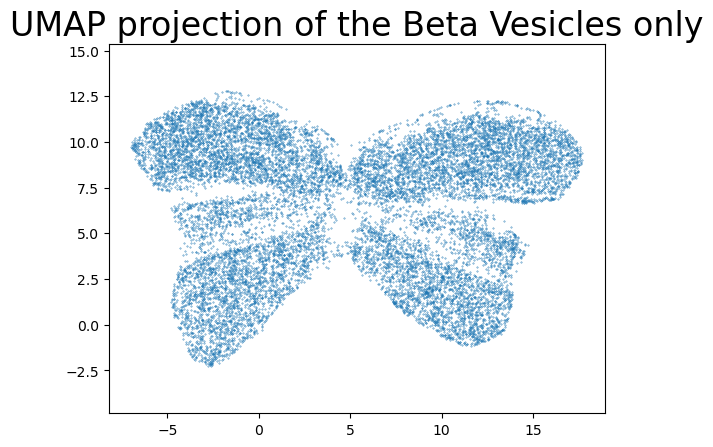

In [240]:
dot_size = 0.1

plt.scatter(
    embeddingB[:, 0],
    embeddingB[:, 1],s=dot_size

    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta Vesicles only', fontsize=24);

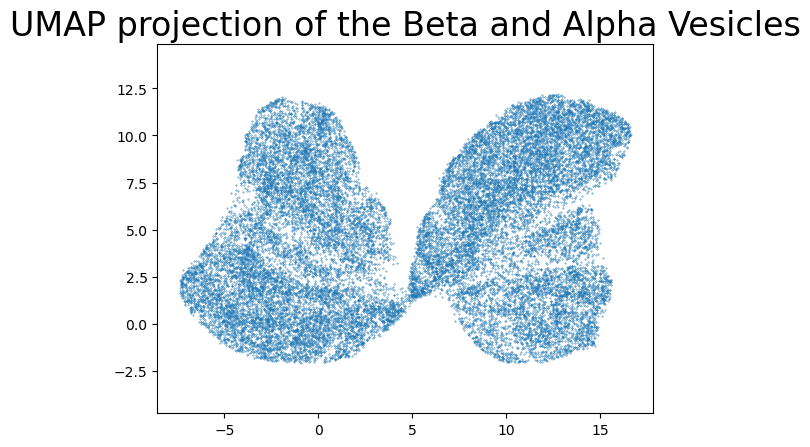

In [207]:
dot_size = 0.1

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],s=dot_size

    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicles', fontsize=24);

In [162]:
# Ensure the Label column is of type string
filtered_combined_dfBothtotal["Label"] = filtered_combined_dfBothtotal["Label"].astype(str)
# Define the color mapping
color_mapping = {"0": 2, "1": 3}
colors = [sns.color_palette()[color_mapping[label]] for label in filtered_combined_dfBothtotal["Label"]]

#2 is green, 3 is red

C:\Users\bzwii\AppData\Local\Temp\ipykernel_33708\222193583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined_dfBothtotal["Label"] = filtered_combined_dfBothtotal["Label"].astype(str)


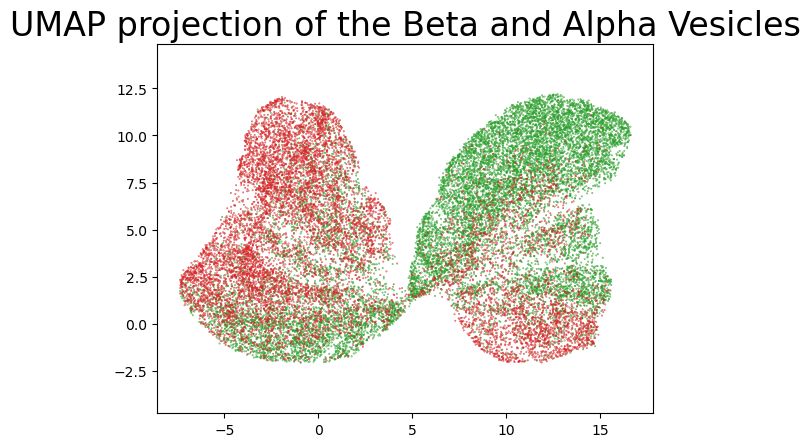

In [208]:
dot_size = 0.1

# Create the scatter plot
plt.scatter(
    embedding[:, 0],  # assuming 'embedding' is an array-like object with the coordinates
    embedding[:, 1],
    c=colors,  # Use the colors list defined above
    s=dot_size  # Set the dot size
)

# Adjust plot appearance
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicles', fontsize=24)

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta.png")

plt.show()



# Color Coded Cells

In [56]:
#Adding individual cell labels to Alpha cells

dfRes8_3_4 = ResMultAlpha(df8_3_4, 43.4)
ColdfRes8_3_4 = dfRes8_3_4.drop(['Label'], axis =1)
ColdfRes8_3_4["Label"] = 1

dfRes9_2_3 = ResMultAlpha(df9_2_3, 30)
ColdfRes9_2_3 = dfRes9_2_3.drop(['Label'], axis =1)
ColdfRes9_2_3["Label"] = 2

dfRes12_4 = ResMultAlphaVoxel(df12_4, 41.66)
ColdfRes12_4 = dfRes12_4.drop(['Label'], axis =1)
ColdfRes12_4["Label"] = 3

dfRes5288_9_1L = ResMultAlphaVoxel(df5288_9_1L, 41.66)
ColdfRes5288_9_1L = dfRes5288_9_1L.drop(['Label'], axis =1)
ColdfRes5288_9_1L["Label"] = 4

dfRes5288_9_2R = ResMultAlphaVoxel(df5288_9_2R, 41.66)
ColdfRes5288_9_2R = dfRes5288_9_2R.drop(['Label'], axis =1)
ColdfRes5288_9_2R["Label"] = 5

dfRes5293_11_12Alpha = ResMultAlpha(df5293_11_12Alpha, 39.98)
ColdfRes5293_11_12Alpha = dfRes5293_11_12Alpha.drop(['Label'], axis =1)
ColdfRes5293_11_12Alpha["Label"] = 6

dfRes10498_32 = ResMultAlphaVoxel(df10498_32, 46.5)
ColdfRes10498_32 = dfRes10498_32.drop(['Label'], axis =1)
ColdfRes10498_32["Label"] = 7

dfRes10504_11_12 = ResMultAlpha(df10504_11_12, 33.1)
ColdfRes10504_11_12 = dfRes10504_11_12.drop(['Label'], axis =1)
ColdfRes10504_11_12["Label"] = 8



In [97]:
#Adding individual cell labels to Beta cells

dfRes10498_9_10 = ResMultBeta(df10498_9_10, 33.1)
ColdfRes10498_9_10 = dfRes10498_9_10.drop(['Label'], axis =1)
ColdfRes10498_9_10["Label"] = 0

dfRes10501_7 = ResMultBetaVoxel(df10501_7, 41.6)
ColdfRes10501_7 = dfRes10501_7.drop(['Label'], axis =1)
ColdfRes10501_7["Label"] = 2

dfRes10501_5 = ResMultBetaVoxel(df10501_5, 39.6)
ColdfRes10501_5 = dfRes10501_5.drop(['Label'], axis =1)
ColdfRes10501_5["Label"] = 3

dfRes10_10_11_12L = ResMultBeta(df10_10_11_12L, 43.4)
ColdfRes10_10_11_12L = dfRes10_10_11_12L.drop(['Label'], axis =1)
ColdfRes10_10_11_12L["Label"] = 4

dfRes10_10_11_12R = ResMultBeta(df10_10_11_12R, 43.4)
ColdfRes10_10_11_12R = dfRes10_10_11_12R.drop(['Label'], axis =1)
ColdfRes10_10_11_12R["Label"] = 5

dfRes10510_32_33 = ResMultBeta(df10510_32_33, 41.6)
ColdfRes10510_32_33 = dfRes10510_32_33.drop(['Label'], axis =1)
ColdfRes10510_32_33["Label"] = 6

dfRes11386_12_13 = ResMultBeta(df11386_12_13, 45.5)
ColdfRes11386_12_13 = dfRes11386_12_13.drop(['Label'], axis =1)
ColdfRes11386_12_13["Label"] = 7



In [33]:
#Beta Coloring Dataset: Adding the Datasets in the correct order = Beta Cells first, then Alpha cells

ColorsBeta = pd.concat([ColdfRes10498_9_10, ColdfRes10501_7, ColdfRes10501_5, ColdfRes10_10_11_12L, ColdfRes10_10_11_12R, ColdfRes10510_32_33, ColdfRes11386_12_13,
                       combined_dfAlphatotal])

#filtering out less than 100 nm vesicles in diameter
filtered_ColorsBeta = ColorsBeta[ColorsBeta['EqDiameter'] >= threshold]
filtered_ColorsBeta.shape

(25384, 14)

In [34]:
#Alpha Coloring Dataset: Adding the Datasets in the correct order = Beta Cells first, then Alpha cells

ColorsAlpha = pd.concat([combined_dfBetatotal,
                         ColdfRes8_3_4, ColdfRes9_2_3, ColdfRes12_4, ColdfRes5288_9_1L, ColdfRes5288_9_2R, ColdfRes5293_11_12Alpha, ColdfRes10498_32, ColdfRes10504_11_12 

    
])

#filtering out less than 100 nm vesicles in diameter
filtered_ColorsAlpha = ColorsAlpha[ColorsAlpha['EqDiameter'] >= threshold]
filtered_ColorsAlpha.shape

(25384, 14)

In [242]:
#creating color code dictionary. lightgrey is used to denote non alpha or beta vesicles

greendict = {
    '0': 'lime',
    '1' : 'lightgrey',
    '2':'yellow',
    '3':'deepskyblue',
    '4':'aquamarine',
    '5':'darkblue',
    '6':'orchid',
    '7':'green'
}


reddict = {
    '0': 'lightgrey',
    '1':'rosybrown',
    '2':'olive',
    '3':'hotpink',
    '4':'darkred',
    '5':'gold',
    '6':'orangered',
    '7':'indigo',
    '8':'red'
}



In [243]:
# Ensure the Label column is of type string
filtered_ColorsBeta["Label"] = filtered_ColorsBeta["Label"].astype(str)
# Define the color mapping
greencolors = [greendict[label] for label in filtered_ColorsBeta["Label"]]

C:\Users\bzwii\AppData\Local\Temp\ipykernel_33708\159734675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ColorsBeta["Label"] = filtered_ColorsBeta["Label"].astype(str)


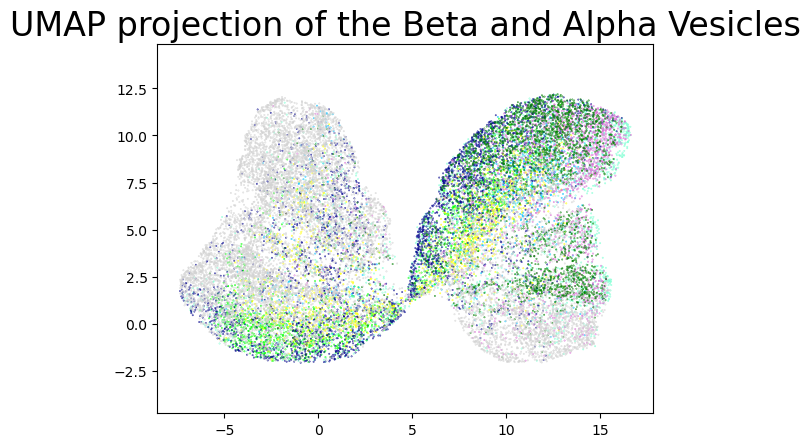

In [245]:
dot_size = 0.1

# Create the scatter plot
plt.scatter(
    embedding[:, 0],  # assuming 'embedding' is an array-like object with the coordinates
    embedding[:, 1],
    c=greencolors,  # Use the colors list defined above
    s=dot_size  # Set the dot size
)

# Adjust plot appearance
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicles', fontsize=24)

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta GreenColored.png")

plt.show()


In [53]:
# Ensure the Label column is of type string
filtered_ColorsAlpha["Label"] = filtered_ColorsAlpha["Label"].astype(str)
# Define the color mapping
redcolors = [reddict[label] for label in filtered_ColorsAlpha["Label"]]

C:\Users\bzwii\AppData\Local\Temp\ipykernel_33708\178868573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ColorsAlpha["Label"] = filtered_ColorsAlpha["Label"].astype(str)


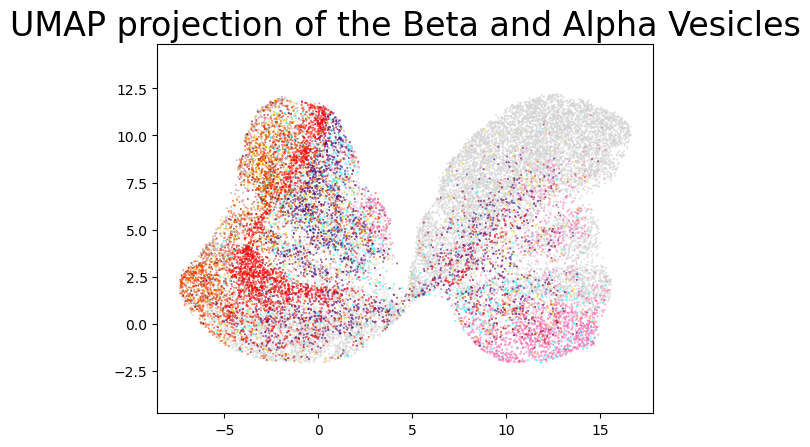

In [211]:
dot_size = 0.1

# Create the scatter plot
plt.scatter(
    embedding[:, 0],  # assuming 'embedding' is an array-like object with the coordinates
    embedding[:, 1],
    c=redcolors,  # Use the colors list defined above
    s=dot_size  # Set the dot size
)

# Adjust plot appearance
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicles', fontsize=24)

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta RedColored.png")

plt.show()

# Color Coded Vesicle Parameters

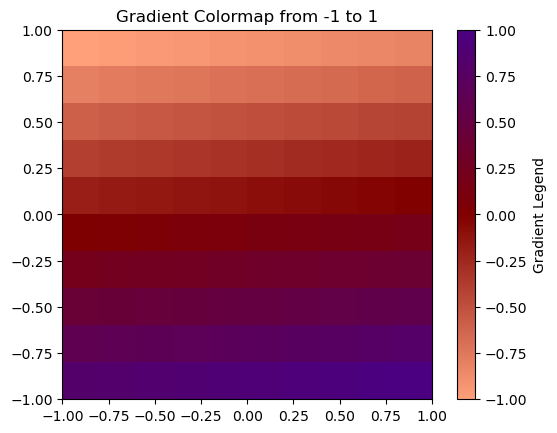

In [241]:
#no longer using this color scheme lol

from matplotlib.colors import LinearSegmentedColormap
#color_start = 'lightsalmon'
#color_mid = 'maroon'
#color_end = 'indigo'

color_start = 'lightsalmon'
color_mid = 'maroon'
color_end = 'indigo'

# Create a list of colors with gradual transitions
colors = [color_start, color_mid, color_end]

# Create a custom gradient colormap
gradient_cmap = LinearSegmentedColormap.from_list('gradient', colors, N=256)

# Generate some data ranging from -1 to 1
data = np.linspace(-1, 1, 100).reshape(10, 10)

# Create a plot using the custom gradient colormap
plt.imshow(data, cmap=gradient_cmap, extent=(-1, 1, -1, 1))
plt.colorbar(label='Gradient Legend')
plt.title('Gradient Colormap from -1 to 1')
plt.show()

In [165]:
scaled_BetaAlpha_Data_df = pd.DataFrame(scaled_BetaAlpha_Data)
type(scaled_BetaAlpha_Data_df)

## convert array to dataframe, necessary for accessing data for colorcoding

pandas.core.frame.DataFrame

In [166]:
filtered_combined_dfBothtotal.head(3)

Mean    Median  Majority   Maximum   Minimum    Stddev  \
0  0.372187  0.372929  0.371851  0.380252  0.360607  0.005165   
1  0.372027  0.372273  0.372010  0.379699  0.362798  0.004332   
2  0.394020  0.391791  0.394144  0.416728  0.373160  0.010145   

   HistoQuantile25  HistoQuantile75  LAC InterQuantile Range  HistoSkewness  \
0         0.369572         0.375679                 0.006107      -0.664841   
1         0.368729         0.373783                 0.005054       0.060758   
2         0.387169         0.402133                 0.014964       0.236442   

   HistoKurtosis  EqDiameter     Volume3d         Area3d Label  
0       0.092094  111.473518   725293.820   39167.619256     0  
1      -0.545557  118.458280   870352.584   43555.756428     0  
2      -0.745619  188.691515  3517675.027  113391.252560     0

In [853]:
pip install cmocean


     -------------------------------------- 222.1/222.1 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
import cmocean
inverted_cmocean = cmocean.cm.thermal.reversed()


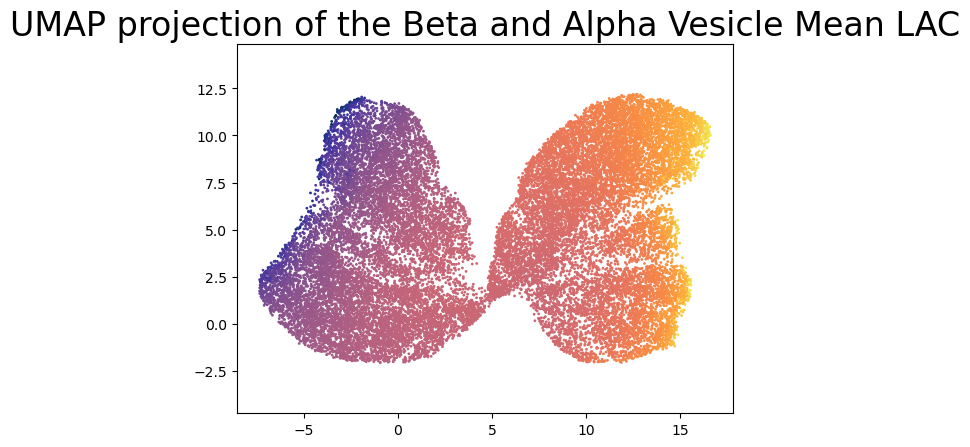

In [212]:
Means = scaled_BetaAlpha_Data_df.iloc[:,0] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Means,
    cmap = inverted_cmocean,
    s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Mean LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Mean.png")


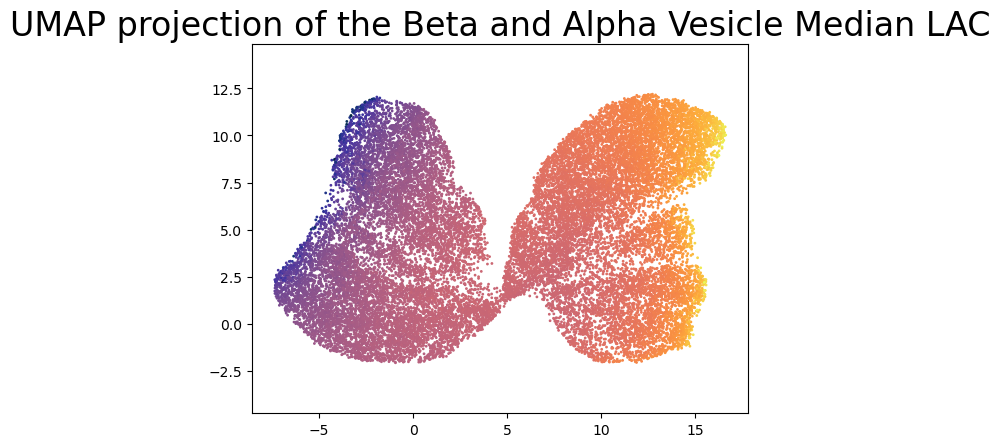

In [213]:
Median = scaled_BetaAlpha_Data_df.iloc[:,1] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Median,
    cmap = inverted_cmocean,
    s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Median LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Median.png")

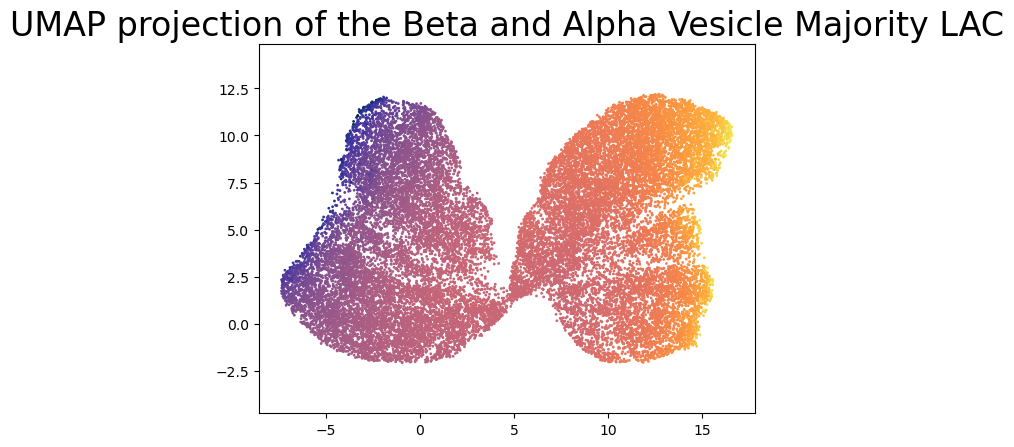

In [214]:
Majority = scaled_BetaAlpha_Data_df.iloc[:,2] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Majority,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Majority LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Majority.png")

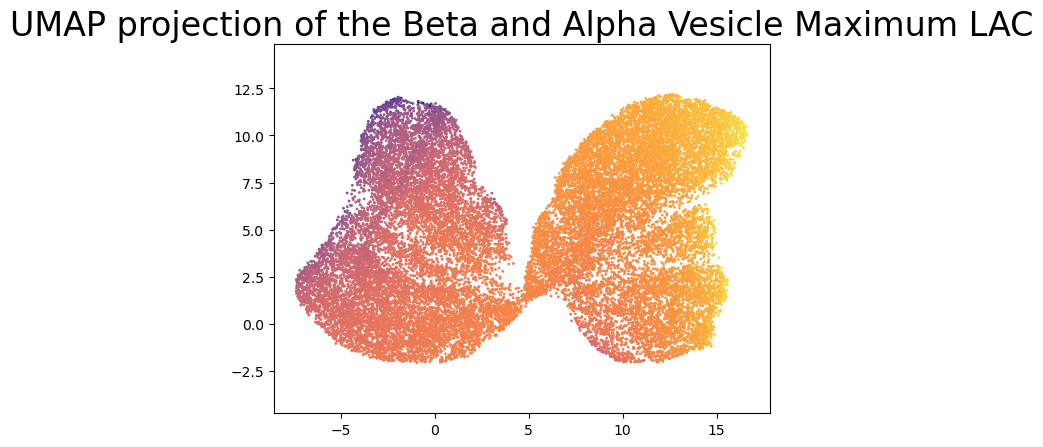

In [215]:
Maximum = scaled_BetaAlpha_Data_df.iloc[:,3] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Maximum,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Maximum LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Maximum.png")

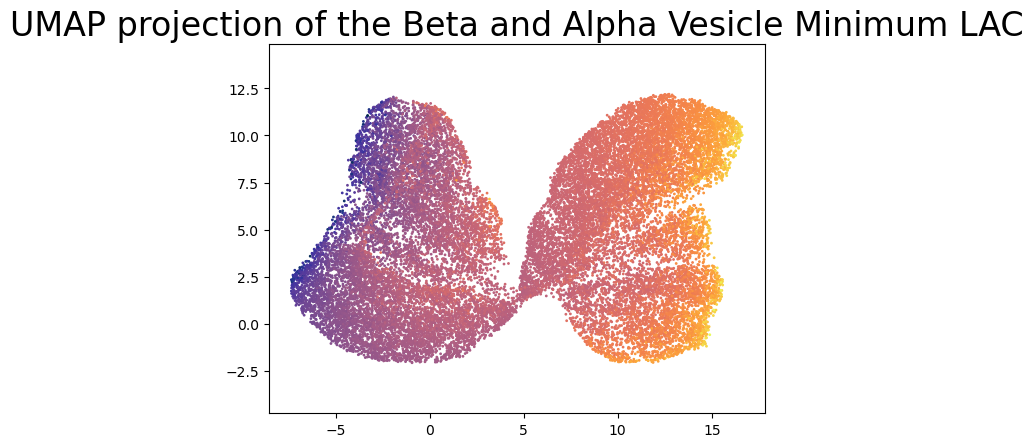

In [216]:
Minimum = scaled_BetaAlpha_Data_df.iloc[:,4] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Minimum,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Minimum LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Minimum.png")

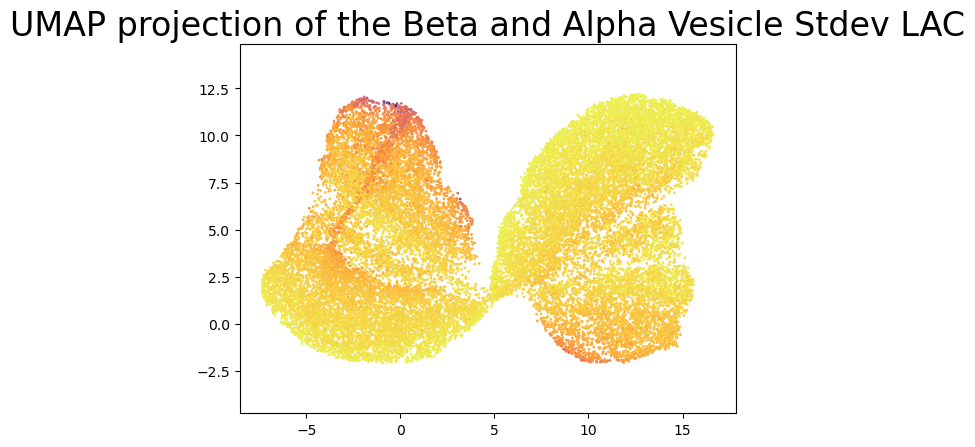

In [217]:
Stdev = scaled_BetaAlpha_Data_df.iloc[:,5] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Stdev,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Stdev LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Stdev.png")

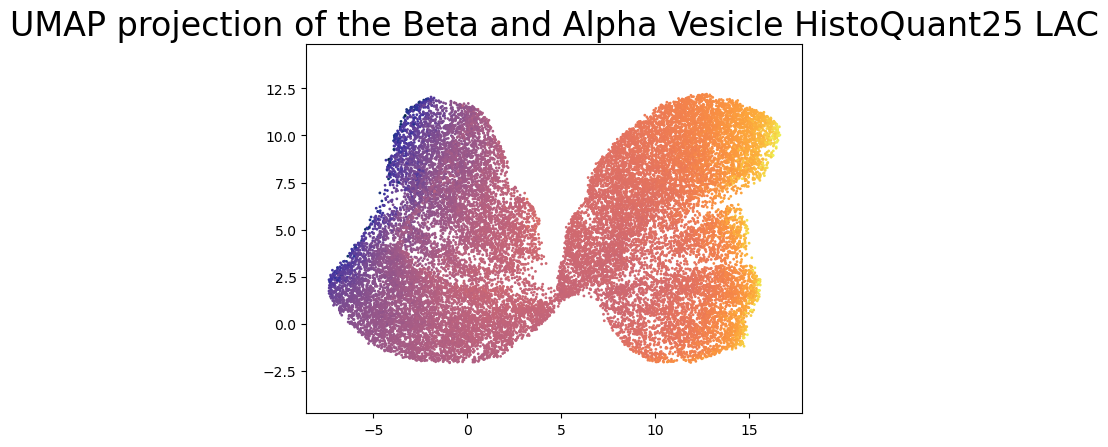

In [218]:
HistoQuant25 = scaled_BetaAlpha_Data_df.iloc[:,6] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = HistoQuant25,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle HistoQuant25 LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta HistoQuant25.png")

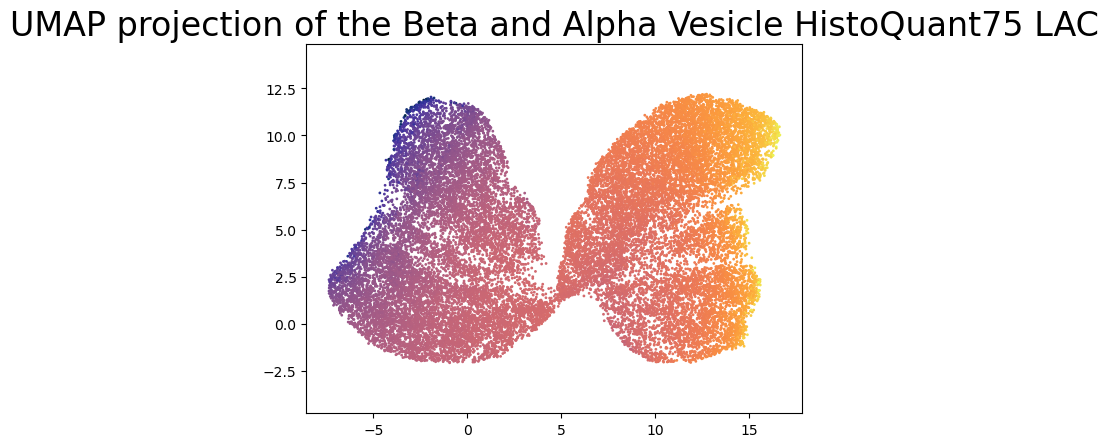

In [219]:
HistoQuant75 = scaled_BetaAlpha_Data_df.iloc[:,7] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = HistoQuant75,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle HistoQuant75 LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta HistoQuant75.png")

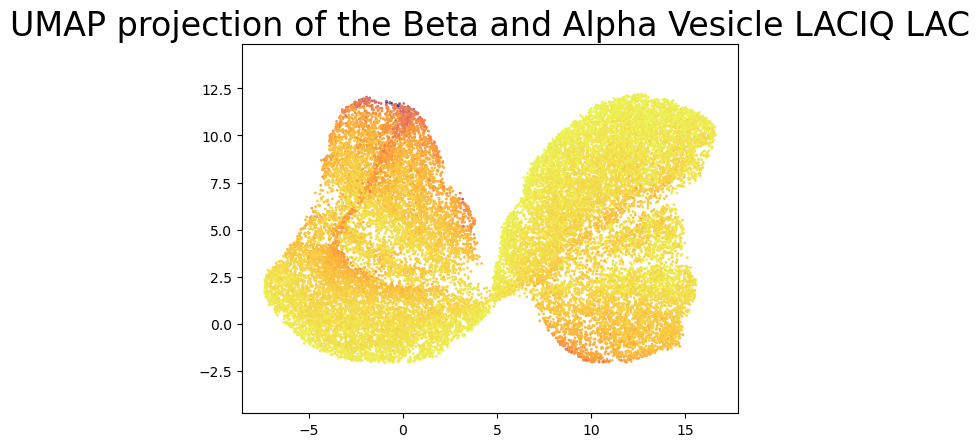

In [220]:
LACIQ = scaled_BetaAlpha_Data_df.iloc[:,8] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = LACIQ,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle LACIQ LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta LACIQ.png")

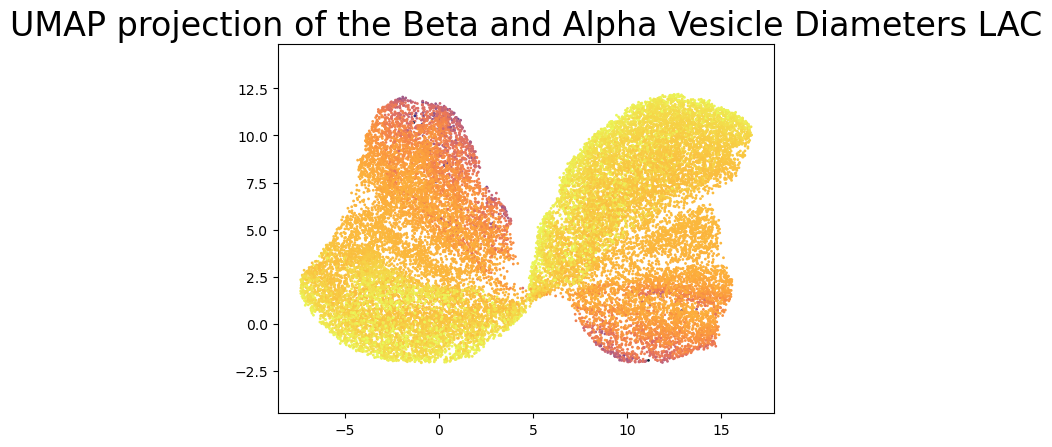

In [221]:
Diameters = scaled_BetaAlpha_Data_df.iloc[:,9] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Diameters,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Diameters LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Diameters.png")

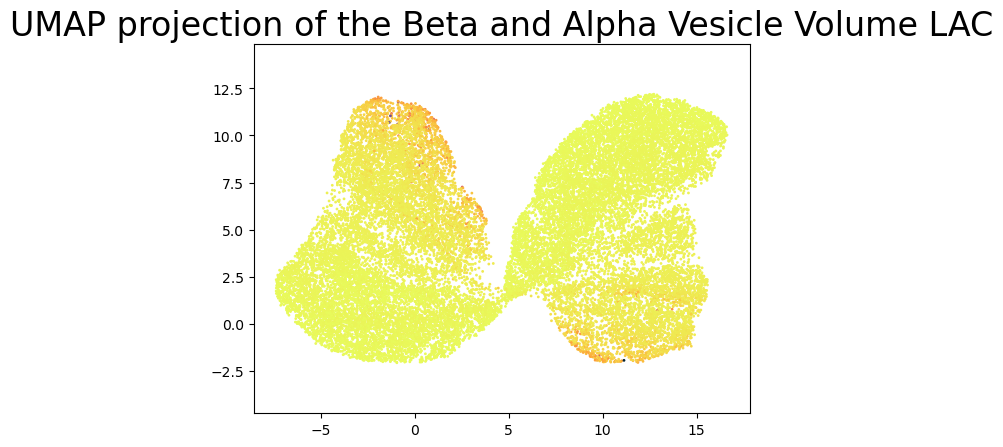

In [222]:
Volume = scaled_BetaAlpha_Data_df.iloc[:,10] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Volume,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle Volume LAC', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Volume.png")

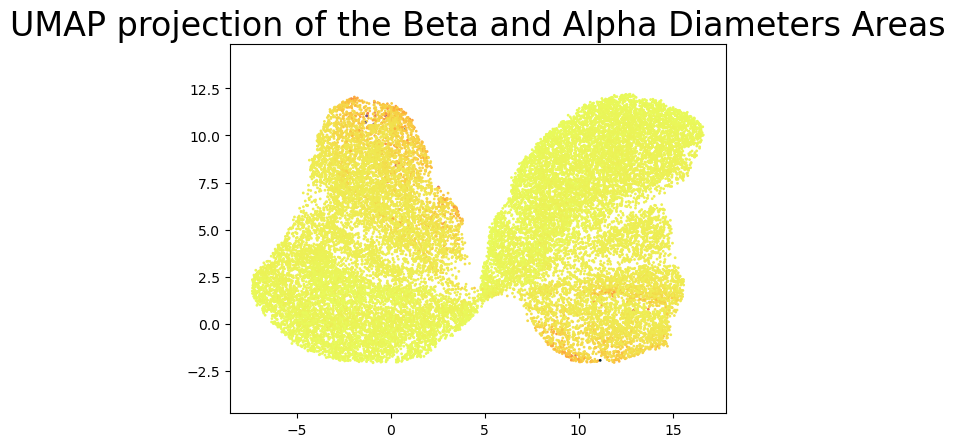

In [223]:
Area = scaled_BetaAlpha_Data_df.iloc[:,11] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = Area,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Diameters Areas', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Area.png")

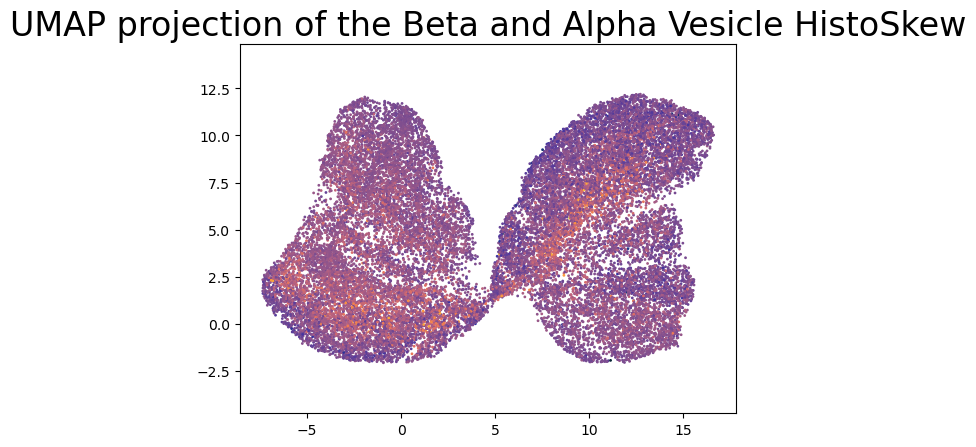

In [231]:
HistoSkew = scaled_BetaAlpha_Data_df.iloc[:,12] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = HistoSkew,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle HistoSkew', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta HistoSkew.png")

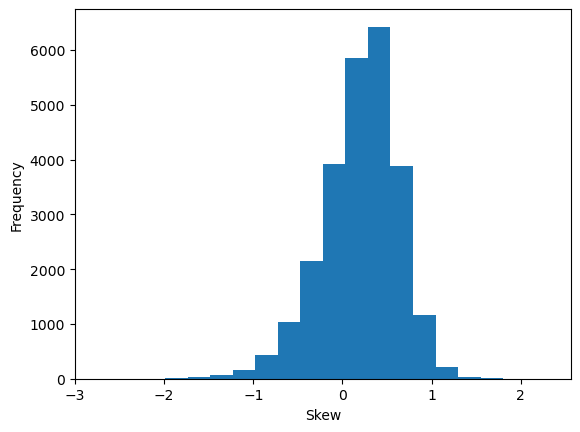

In [256]:
SkewsHist = scaled_BetaAlpha_Data_df.iloc[:,12]
plt.xlabel('Skew')
plt.ylabel('Frequency')
plt.hist(SkewsHist, bins = 20)
plt.savefig("E:/Paper Figures/AlphaBetaPaper/BothSkewDistribution.png")

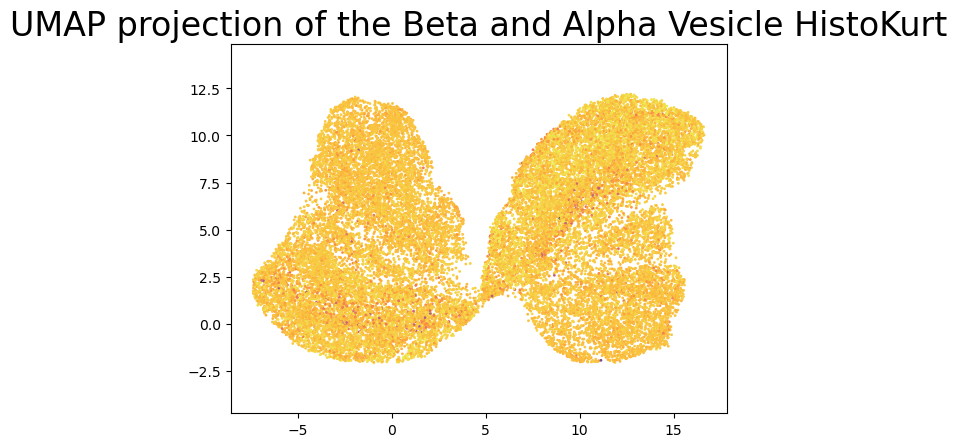

In [228]:
HistoKurt = scaled_BetaAlpha_Data_df.iloc[:,13] 
dot_size = 1

plt.scatter(
    
    embedding[:, 0],
    embedding[:, 1],
    c = HistoKurt,
    cmap = inverted_cmocean
   , s = dot_size
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Vesicle HistoKurt', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta HistoKurt.png")

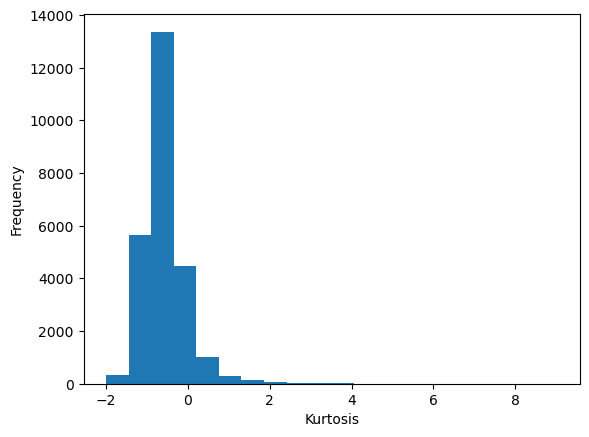

In [257]:
SkewsKurt = scaled_BetaAlpha_Data_df.iloc[:,13]
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.hist(SkewsKurt, bins = 20)
plt.savefig("E:/Paper Figures/AlphaBetaPaper/BothKurtosisDistribution.png")